In [2]:
!pip install mysql-connector-python
!pip install pandas

In [3]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv', 'order_items')# Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='Rudraksh902.',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/vrjav/Downloads/project_1_dataset'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [12]:
db = mysql.connector.connect(host = "127.0.0.1", username = "root", password = "Rudraksh902.", database = "ecommerce")

cur = db.cursor(buffered=True)

# all unique cities where customers are located.

In [13]:
query = """ select distinct customer_city from customers """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data)
df.head()

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


# number of orders placed in 2017.

In [14]:
query = """ SELECT count(*) as 'total_orders' FROM ecommerce.orders
where year(order_purchase_timestamp) = 2017
"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ['no. of orders'])
df.head()

,no. of orders
0,225505


# total sales per category.

In [15]:
query = """ 
select e1.product_category, round(sum(payment_value),2) as 'sales' from (SELECT e1.order_id, e2.product_category FROM ecommerce.order_items e1
join ecommerce.products e2
on e1.product_id = e2.product_id) e1
join ecommerce.payments e2
on e1.order_id = e2.order_id
group by e1.product_category
order by round(sum(payment_value),2) desc
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ['categories', 'sales'])

df.head()

,categories,sales
0,bed table bath,77064915.20
1,HEALTH BEAUTY,74581790.37
2,computer accessories,71339870.08
3,Furniture Decoration,64357937.63
4,Watches present,64314750.54


# percentage of orders that were paid in installments.

In [16]:
query = """ 
SELECT
sum(case when payment_installments >= 1 then 1 else 0 end)*100.0/count(*) as 'percentage'
FROM ecommerce.payments;
"""

cur.execute(query)

data = cur.fetchall()
"the percentage of orders that were paid in installments is", data[0][0]

('the percentage of orders that were paid in installments is',
 Decimal('99.99807'))

# counting number of customers from each state.

In [26]:
!pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 624.4 kB/s eta 0:00:13
   --- ------------------------------------ 0.8/8.1 MB 877.2 kB/s eta 0:00:09
   ----- ---------------------------------- 1.0/8.1 MB 944.2 kB/s eta 0:00:08
   ------- -------------------------------- 1.6/8.1 MB 1.3 MB/s eta 0:00:06
   --------- ------------------------------ 1.8/8.1 MB 1.4 MB/s eta 0:00:05
   ----------- ---------------------------- 2.4/8.1 MB 1.4 MB/s eta 0:00:05
   ------------ --------------------------- 2.6/8.1 MB 1.5 MB/s eta 0:00:04
   ------------ --------------------------- 2.6/8.1 MB 1.5 MB/s eta 0:00:04
   ------------ --------------------------- 2.6/8.1 MB 1.5 MB/s eta 0:00:04
   ------------ --------------------------- 2.6/8.1 MB 1.5 MB/s eta 0:00:04
   -------------- ---------

In [27]:
!pip install seaborn

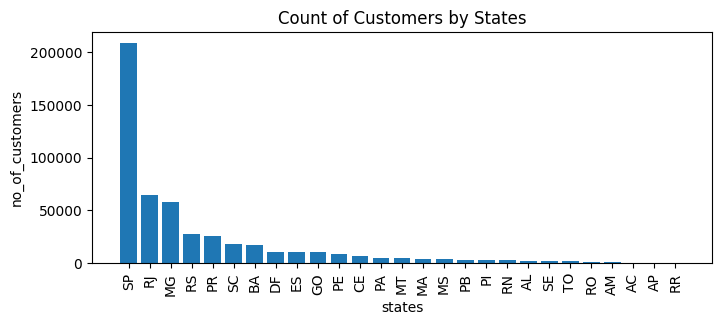

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
query = """ 
SELECT customer_state, count(*)
FROM ecommerce.customers
group by customer_state
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns=['state', 'no_of_customers'])

df = df.sort_values(by = "no_of_customers", ascending= False)

plt.figure(figsize = (8,3))
plt.bar(df["state"], df["no_of_customers"])
plt.xticks(rotation = 90)
plt.xlabel("states")
plt.ylabel("no_of_customers")
plt.title("Count of Customers by States")
plt.show()

# number of orders per month in 2018.

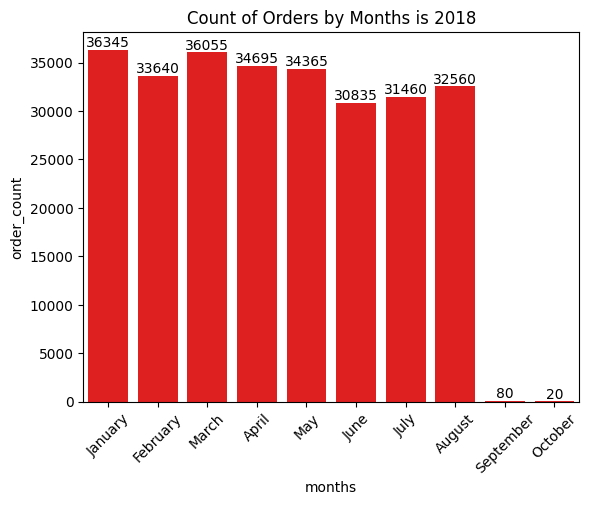

In [34]:
query = """ 
/*6. Calculate the number of orders per month in 2018.*/
SELECT monthname(order_purchase_timestamp) as 'month', count(*) as 'cnt' FROM ecommerce.orders
where year(order_purchase_timestamp) = 2018
group by monthname(order_purchase_timestamp)
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ['months', 'order_count'])
o = ["January", "February","March","April","May","June","July","August","September","October"]

ax = sns.barplot(x = df["months"],y =  df["order_count"], data = df, order = o, color = "red")
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.title("Count of Orders by Months is 2018")

plt.show()


# average number of products per order, grouped by customer city.

In [22]:
cur.execute("USE ecommerce") 
query = """ 
select e2.customer_city, avg(t.cnt) from (select e1.order_id, e1.cnt, e2.customer_id from (select e1.order_id, count(e2.product_id) as 'cnt' from orders e1
join order_items e2
on e1.order_id = e2.order_id
group by e1.order_id) e1
join orders e2
on e1.order_id = e2.order_id) t
join customers e2
on t.customer_id = e2.customer_id
group by e2.customer_city

"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns=['customer_city', 'avg_products_per_order'])

df.head()

,customer_city,avg_products_per_order
0,curitiba,17.3940
1,belo horizonte,17.1491
2,atibaia,17.4841
3,andorinha,15.0000
4,salvador,17.1082


# percentage of total revenue contributed by each product category.

In [36]:
cur.execute("USE ecommerce") 
query = """ 
select product_category, sales*100/sum as 'percent_contribution' from (select *,
sum(sales) over() as 'sum'
from (select e1.product_category, round(sum(payment_value),2) as 'sales' from (SELECT e1.order_id, e2.product_category FROM order_items e1
join products e2
on e1.product_id = e2.product_id) e1
join payments e2
on e1.order_id = e2.order_id
group by e1.product_category) m)v
order by sales*100/sum desc

"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns=['product_category', 'percent_contribution'])

df.head()

,product_category,percent_contribution
0,bed table bath,8.432846
1,HEALTH BEAUTY,8.161129
2,computer accessories,7.806381
3,Furniture Decoration,7.042382
4,Watches present,7.037656


# correlation between product price and the number of times a product has been purchased.

In [38]:
import numpy as np
cur.execute("USE ecommerce") 
query = """ 
SELECT e1.product_category, count(distinct (e2.product_id)) as 'cnt', round(avg(e2.price),2) as 'avg' FROM products e1
join order_items e2
on e1.product_id = e2.product_id
group by e1.product_category
order by count(distinct(e2.product_id)) desc

"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ['product_category', 'cnt', 'avg'])

arr1 = df["cnt"]
arr2 = df["avg"]

a = np.corrcoef([arr1,arr2])
print("the correlation is", a[0][-1])

the correlation is -0.11340404746354145


# total revenue generated by each seller, and rank them by revenue.

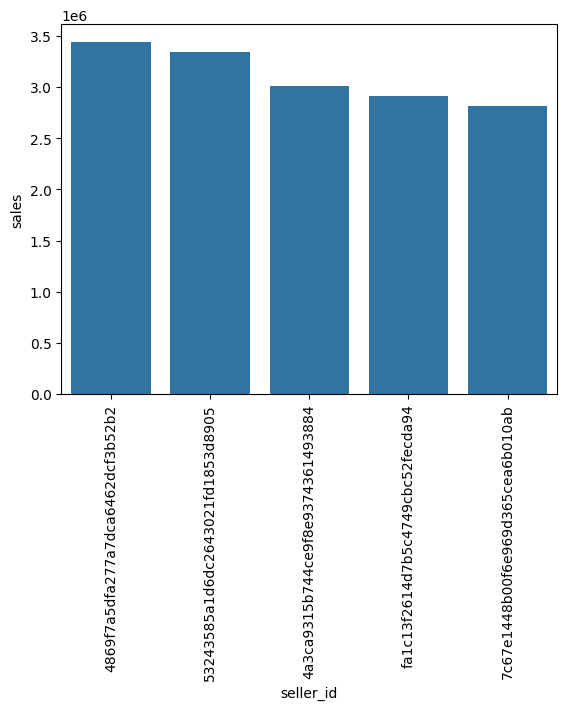

In [40]:
query = """ 
select *,
dense_rank() over(order by sales desc) as 'rank'
from (SELECT e1.seller_id, round(sum(price),2) as 'sales' FROM ecommerce.sellers e1
left join ecommerce.order_items e2
on e1.seller_id = e2.seller_id
group by e1.seller_id) t
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns=['seller_id', 'sales', 'rank'])
df=df.head()
sns.barplot(x = "seller_id", y = "sales", data = df)
plt.xticks(rotation = 90)
plt.show()

# moving average of order values for each customer over their order history.

In [41]:
query = """ 
/*11. Calculate the moving average of order values for each customer over their order history.*/
select *,
avg(payment_value) over(partition by customer_id order by order_purchase_timestamp rows between 2 preceding and current row) as 'moving_avg'
from (SELECT e2.customer_id, e1.payment_value, e2.order_purchase_timestamp FROM ecommerce.payments e1
join ecommerce.orders e2
on e1.order_id = e2.order_id) t

"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ['customer_id', 'payment_value', 'order_purchase_timestamp', 'moving_avg'])

df.head()

,customer_id,payment_value,order_purchase_timestamp,moving_avg
0,00012a2ce6f8dcda20d059ce98491703,114.74,2017-11-14 16:08:26,114.739998
1,00012a2ce6f8dcda20d059ce98491703,114.74,2017-11-14 16:08:26,114.739998
2,00012a2ce6f8dcda20d059ce98491703,114.74,2017-11-14 16:08:26,114.739998
3,00012a2ce6f8dcda20d059ce98491703,114.74,2017-11-14 16:08:26,114.739998
4,00012a2ce6f8dcda20d059ce98491703,114.74,2017-11-14 16:08:26,114.739998


# cumulative sales per month for each year.

In [42]:
query = """ 
select *,
round(sum(payment_value) over(partition by month_year order by month_year rows between unbounded preceding and current row),2) as 'cumsum'
from (SELECT date_format(e1.order_purchase_timestamp,'%Y-%m') as 'month_year', e2.payment_value FROM ecommerce.orders e1
join ecommerce.payments e2
on e1.order_id = e2.order_id) t
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ['month_year', 'payment_value', 'cumsum'])

df.head()

,month_year,payment_value,cumsum
0,2016-09,75.06,75.06
1,2016-09,75.06,150.12
2,2016-09,75.06,225.18
3,2016-09,75.06,300.24
4,2016-09,75.06,375.30


# year-over-year growth rate of total sales.

In [43]:
query = """ 
select year,
ifnull((sum-lag_sum)*100/lag_sum , 0) as 'growth_rate'
from (select *,
lag(sum) over(order by year) as 'lag_sum'
from (SELECT year(e1.order_purchase_timestamp) as 'year', sum(e2.payment_value) as 'sum' FROM ecommerce.orders e1
join ecommerce.payments e2
on e1.order_id = e2.order_id
group by year(e1.order_purchase_timestamp)) t) m
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data,columns=['year','growth_rate'])

df.head()

,year,growth_rate
0,2016,0.000000
1,2017,12112.703760
2,2018,20.000924


# retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [44]:
query = """ 
select sum(case when months_between < 6 then 1 else 0 end)*100/count(distinct(customer_id)) as 'retention_rate'
from (select customer_id, TIMESTAMPDIFF(MONTH, lead_date, date) 'months_between'  from (select *,
lead(date) over(partition by customer_id order by date asc) as 'lead_date'
from (select distinct *
from (SELECT customer_id, date_format(order_purchase_timestamp, "%Y-%m-%d") as 'date'
FROM ecommerce.orders ) t) m)d) e
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ['retention_rate'])

df.head()

,retention_rate
0,0.0000


# top 3 customers who spent the most money in each year.

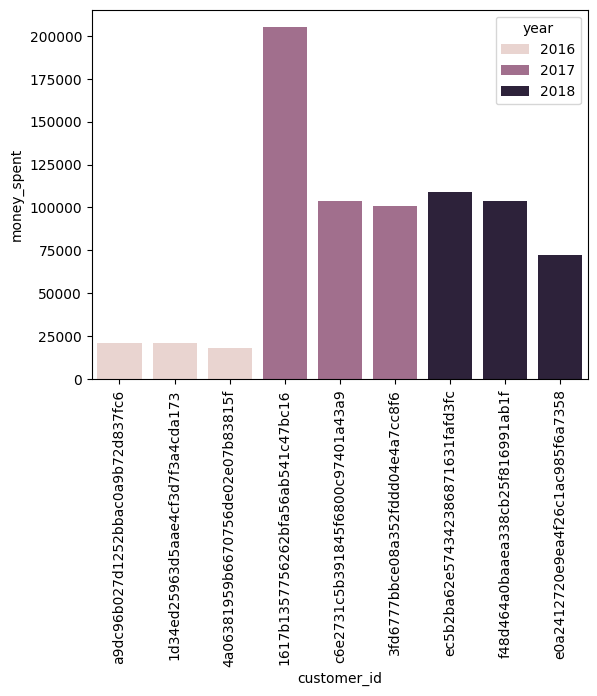

In [45]:
query = """ 
select customer_id, year, sum from (select *,
row_number() over(partition by year order by sum desc) as 'rn'
from (SELECT e1.customer_id, year(e1.order_purchase_timestamp) as 'year',sum(e2.payment_value) as 'sum' FROM ecommerce.orders e1
join ecommerce.payments e2
on e1.order_id = e2.order_id
group by customer_id, year(e1.order_purchase_timestamp))t) m
where rn <= 3
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ['customer_id', 'year', 'money_spent'])
sns.barplot(x = "customer_id", y = "money_spent", data = df, hue = "year")
plt.xticks(rotation = 90)
plt.show()